In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
dataset = pd.read_csv('Chicago_Crimes_2012_to_2017.csv')
dataset.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


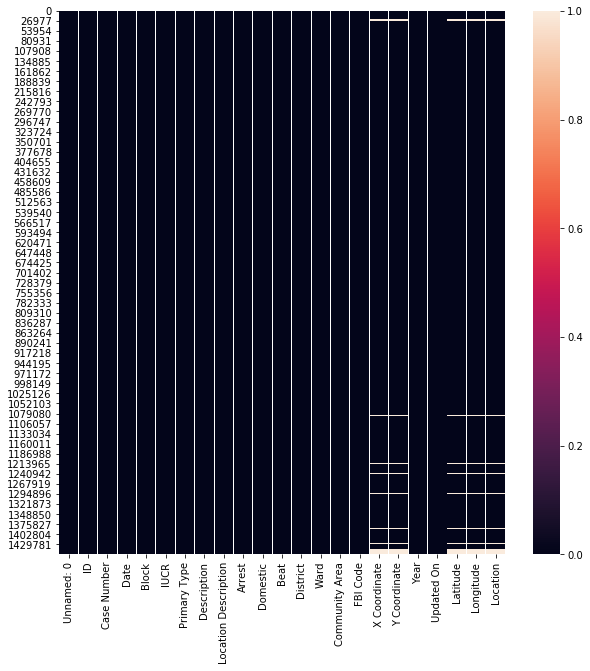

In [6]:
plt.figure(figsize = (10, 10))
sns.heatmap(dataset.isnull())

In [53]:
df = dataset.copy()
df = df.dropna()
df = df.drop(columns = ['Unnamed: 0', 'Block', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 
                             'FBI Code', 'Beat', 'Ward','Community Area', 'District'], axis = 1)
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Latitude,Longitude,Location
0,10508693,05/03/2016 11:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,10508695,05/03/2016 09:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,10508697,05/03/2016 11:31:00 PM,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,10508698,05/03/2016 10:10:00 PM,BATTERY,SIMPLE,SIDEWALK,False,False,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,10508699,05/03/2016 10:00:00 PM,THEFT,$500 AND UNDER,RESIDENCE,False,True,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [54]:
%%time
df.Date = pd.to_datetime(df.Date, format = '%m/%d/%Y %I:%M:%S %p')

Wall time: 7.02 s


In [55]:
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Latitude,Longitude,Location
0,10508693,2016-05-03 23:40:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,10508695,2016-05-03 21:40:00,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,10508697,2016-05-03 23:31:00,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,10508698,2016-05-03 22:10:00,BATTERY,SIMPLE,SIDEWALK,False,False,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,10508699,2016-05-03 22:00:00,THEFT,$500 AND UNDER,RESIDENCE,False,True,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [56]:
%%time
df.index = df.Date

Wall time: 0 ns


In [57]:
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Latitude,Longitude,Location
Date,,,,,,,,,,
2016-05-03 23:40:00,10508693,2016-05-03 23:40:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,41.864073,-87.706819,"(41.864073157, -87.706818608)"
2016-05-03 21:40:00,10508695,2016-05-03 21:40:00,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2016-05-03 23:31:00,10508697,2016-05-03 23:31:00,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,41.894908,-87.758372,"(41.894908283, -87.758371958)"
2016-05-03 22:10:00,10508698,2016-05-03 22:10:00,BATTERY,SIMPLE,SIDEWALK,False,False,41.885687,-87.749516,"(41.885686845, -87.749515983)"
2016-05-03 22:00:00,10508699,2016-05-03 22:00:00,THEFT,$500 AND UNDER,RESIDENCE,False,True,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [58]:
# list_of_type = list(df['Primary Type'].value_counts().index[20:])
list_of_description = list(df['Description'].value_counts().index[20:])
list_of_location_description = list(df['Location Description'].value_counts().index[20:])

In [59]:
# df.loc[df['Primary Type'].isin(list_of_type), df.columns == 'Primary Type'] = 'OTHER'
df.loc[df['Description'].isin(list_of_description), df.columns == 'Description'] = 'OTHER'
df.loc[df['Location Description'].isin(list_of_location_description), df.columns == 'Location Description'] = 'OTHER'

In [60]:
# df['Primary Type'] = pd.Categorical(df['Primary Type'])
df['Description'] = pd.Categorical(df['Description'])
df['Location Description'] = pd.Categorical(df['Location Description'])

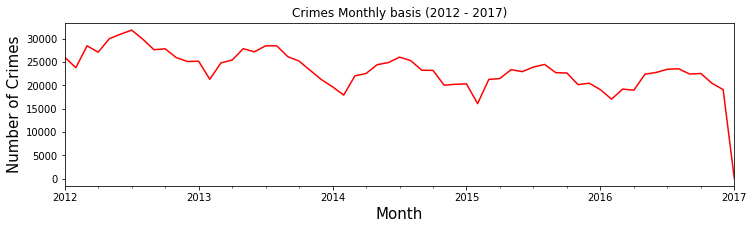

In [42]:
plt.figure(figsize = (12,3))
df['Date'].resample('M').size().plot(legend = False, color = 'red')
plt.title('Crimes Monthly basis (2012 - 2017)')
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Number of Crimes', fontsize = 15)
plt.show()

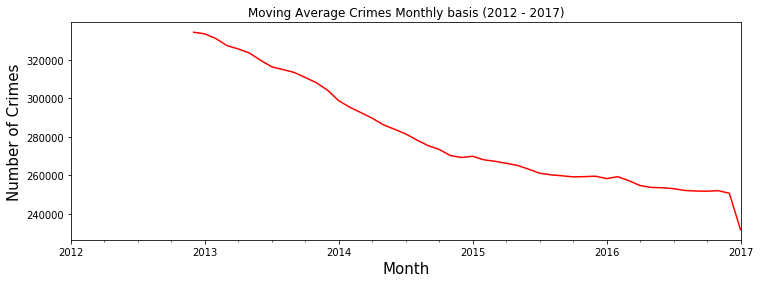

In [45]:
plt.figure(figsize = (12, 4))
df['Date'].resample('M').size().rolling(12).sum().plot(legend = False, color = 'red')
plt.title('Moving Average Crimes Monthly basis (2012 - 2017)')
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Number of Crimes', fontsize = 15)
plt.show()

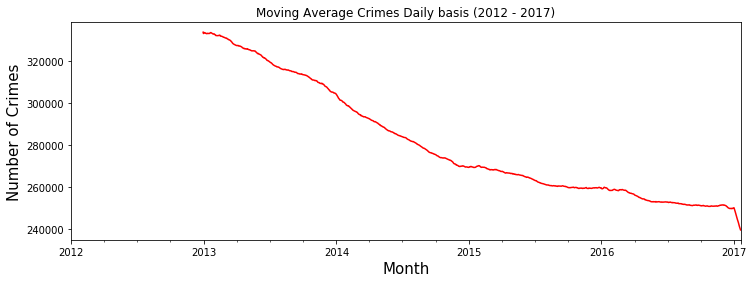

In [46]:
plt.figure(figsize = (12, 4))
df['Date'].resample('D').size().rolling(365).sum().plot(legend = False, color = 'red')
plt.title('Moving Average Crimes Daily basis (2012 - 2017)')
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Number of Crimes', fontsize = 15)
plt.show()

In [78]:
crimes_count_date = df.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=df.index.date, fill_value=0)

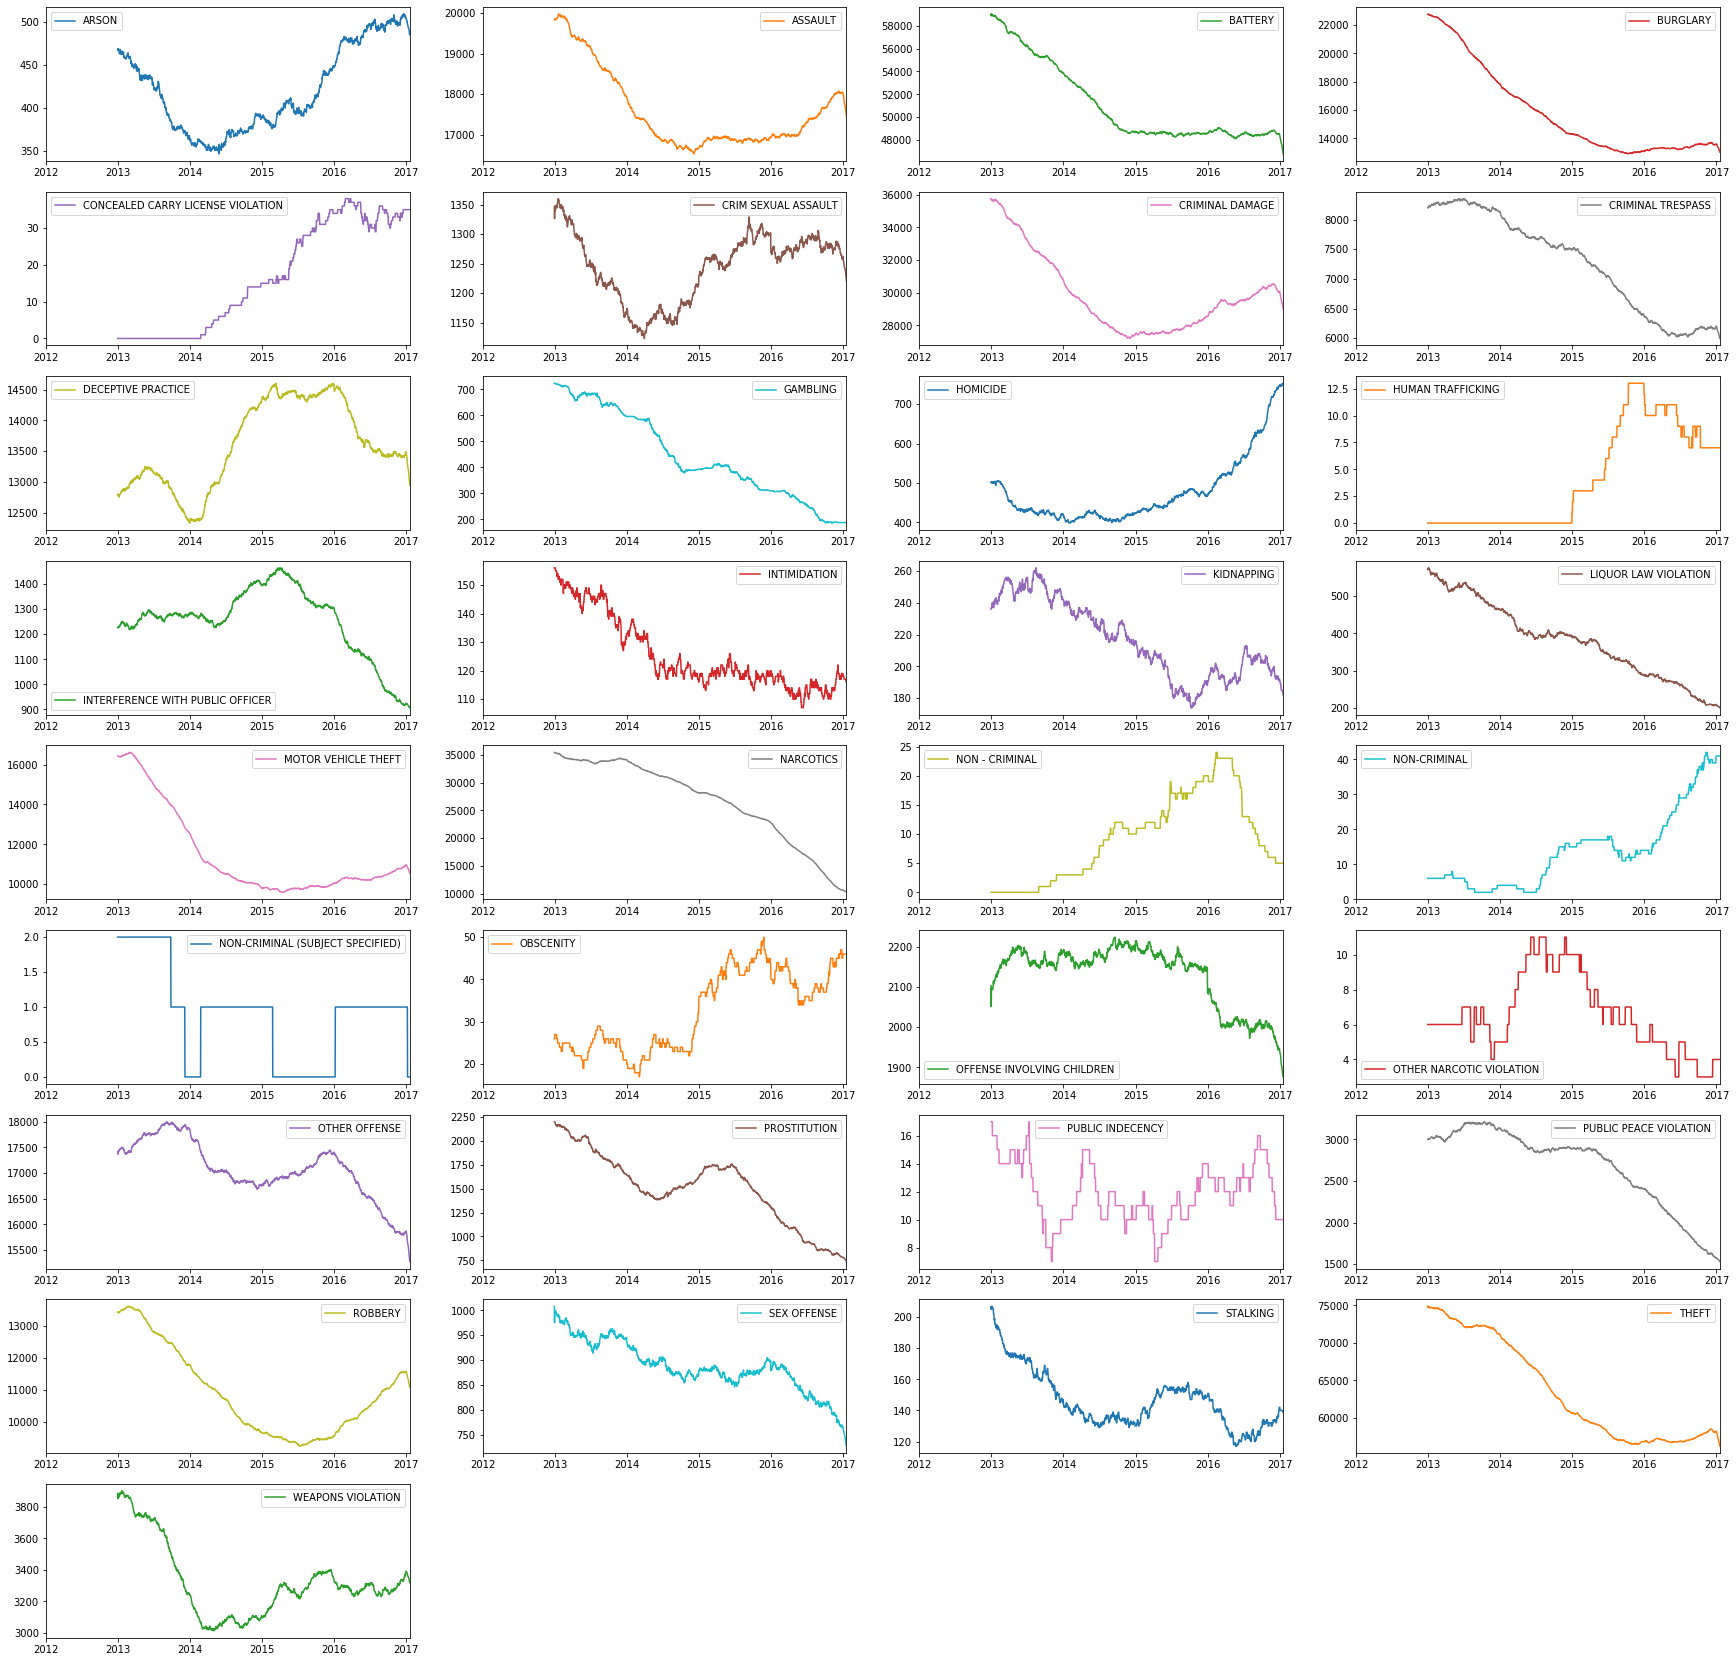

In [83]:
crimes_count_date.rolling(365).sum().plot(figsize=(30, 30), subplots=True, layout=(-1, 4), sharex=False, sharey=False)
plt.show()

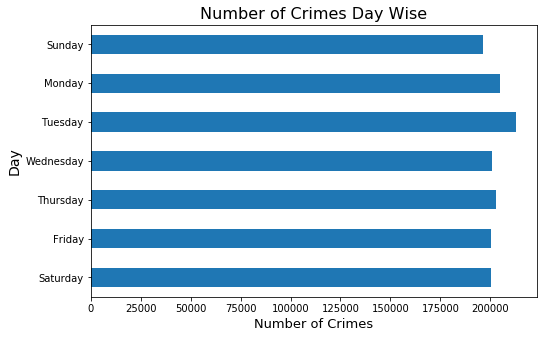

In [99]:
plt.figure(figsize = (8, 5))
day = ['Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday','Sunday']
df.groupby([df.index.dayofweek]).size().plot(kind = 'barh')
plt.title('Number of Crimes Day Wise')
plt.ylabel('Day', fontsize = 14)
plt.yticks(np.arange(7), day)
plt.xlabel('Number of Crimes', fontsize = 13)
plt.show();

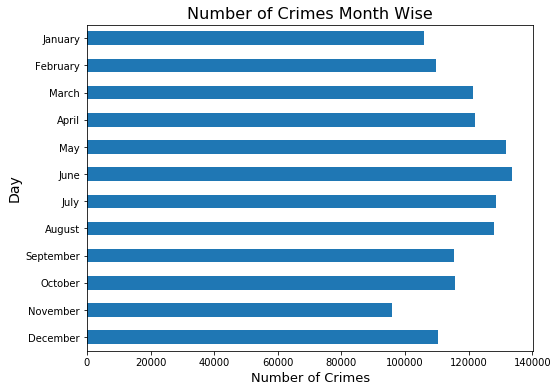

In [109]:
plt.figure(figsize = (8, 6))
day = ['December', 'November', 'October', 'September', 'August', 'July', 'June', 'May',  'April', 'March', 'February', 'January']
df.groupby([df.index.month]).size().plot(kind = 'barh')
plt.title('Number of Crimes Month Wise', fontsize = 16)
plt.ylabel('Day', fontsize = 14)
plt.yticks(np.arange(12), day)
plt.xlabel('Number of Crimes', fontsize = 13)
plt.show();

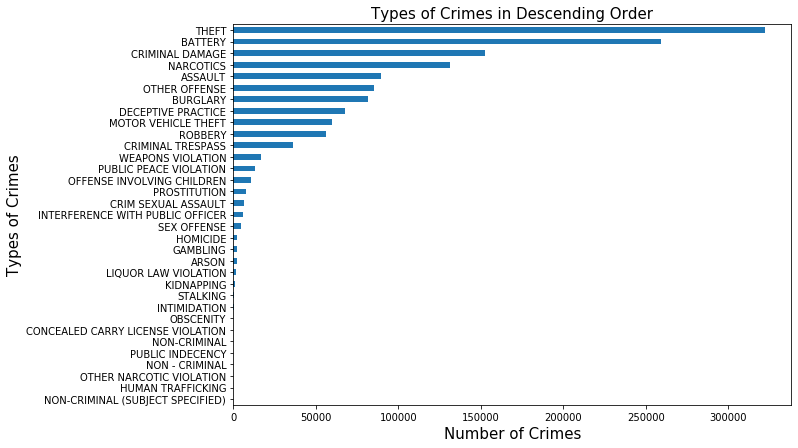

In [149]:
plt.figure(figsize = (10, 7))
df.groupby(df['Primary Type']).size().sort_values(ascending = True).plot(kind = 'barh')
plt.title('Types of Crimes in Descending Order', fontsize = 15)
plt.xlabel('Number of Crimes', fontsize = 15)
plt.ylabel('Types of Crimes', fontsize = 15)
plt.show()

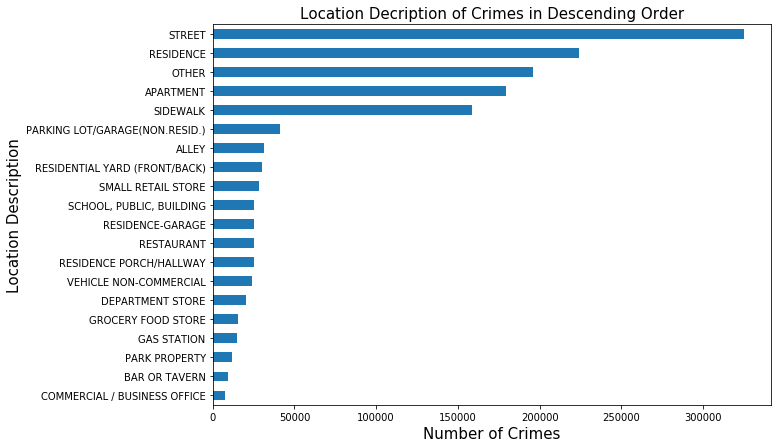

In [148]:
plt.figure(figsize = (10, 7))
df.groupby(df['Location Description']).size().sort_values(ascending = True).plot(kind = 'barh')
plt.title('Location Decription of Crimes in Descending Order', fontsize = 15)
plt.xlabel('Number of Crimes', fontsize = 15)
plt.ylabel('Location Description', fontsize = 15)
plt.show()

In [173]:
hour_by_location = df.pivot_table(values = 'ID', index = 'Location Description', columns = df.index.hour, aggfunc = np.size).fillna(0)
hour_by_type     = df.pivot_table(values = 'ID', index = 'Primary Type', columns = df.index.hour, aggfunc = np.size).fillna(0)
hour_by_week     = df.pivot_table(values = 'ID', index = df.index.hour, columns = df.index.weekday_name, aggfunc = np.size).fillna(0)
hour_by_week     = hour_by_week[days].T

day_by_location = df.pivot_table(values = 'ID', index = 'Location Description', columns = df.index.dayofweek, aggfunc = np.size).fillna(0)
day_by_type     = df.pivot_table(values = 'ID', index = 'Primary Type', columns = df.index.dayofweek, aggfunc = np.size).fillna(0)
type_by_location = df.pivot_table(values = 'ID', index = 'Location Description', columns = 'Primary Type', aggfunc = np.size).fillna(0)

In [201]:
from sklearn.cluster import AgglomerativeClustering as AC

def scale_df(df,axis=0):
    '''
    A utility function to scale numerical values (z-scale) to have a mean of zero
    and a unit variance.
    '''
    return (df - df.mean(axis=axis)) / df.std(axis=axis)

def plot_hmap(df, ix=None, cmap='bwr'):
    '''
    A function to plot heatmaps that show temporal patterns
    '''
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.imshow(df.iloc[ix,:], cmap=cmap)
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]))
    plt.grid(False)
    plt.show()
    
def scale_and_plot(df, ix = None):
    '''
    A wrapper function to calculate the scaled values within each row of df and plot_hmap
    '''
    df_marginal_scaled = scale_df(df.T).T
    if ix is None:
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort() # a trick to make better heatmaps
    cap = np.min([np.max(df_marginal_scaled.as_matrix()), np.abs(np.min(df_marginal_scaled.as_matrix()))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix)
    
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

c:\users\rishi sharma\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


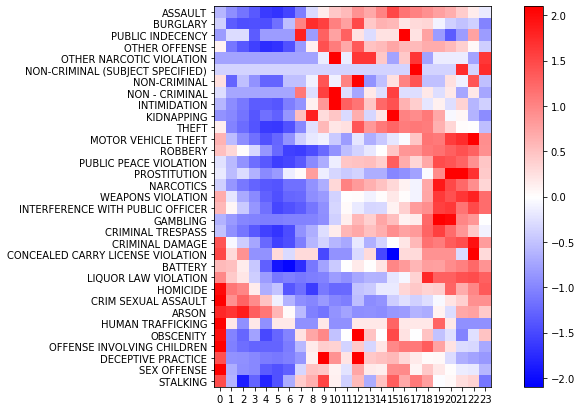

In [202]:
plt.figure(figsize = (12, 7))
scale_and_plot(hour_by_type)

c:\users\rishi sharma\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


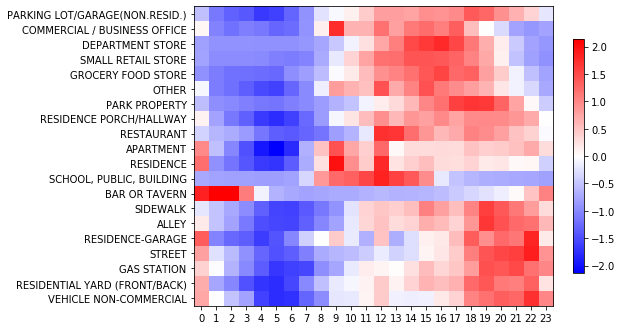

In [186]:
plt.figure(figsize = (7, 12))
scale_and_plot(hour_by_location)

c:\users\rishi sharma\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


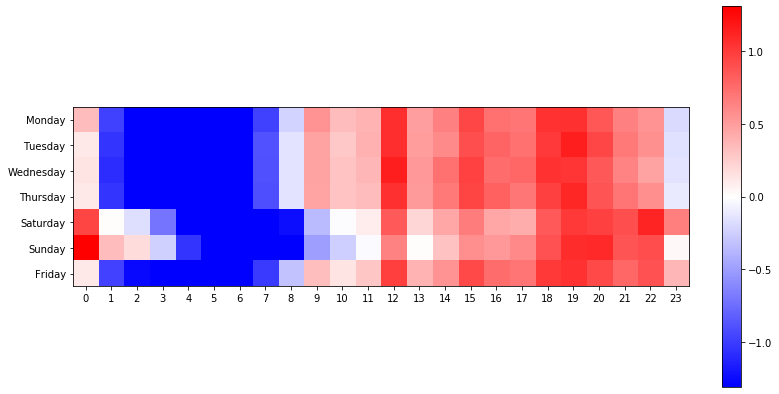

In [189]:
plt.figure(figsize = (12, 7))
scale_and_plot(hour_by_week)

c:\users\rishi sharma\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


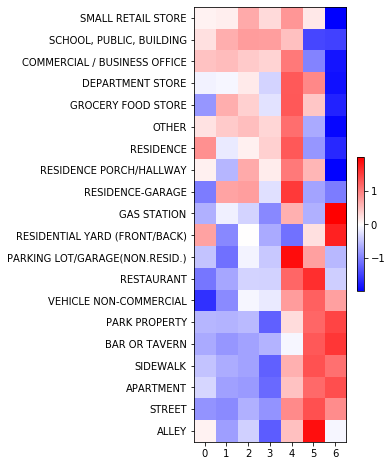

In [191]:
plt.figure(figsize = (4, 8))
scale_and_plot(day_by_location)

c:\users\rishi sharma\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


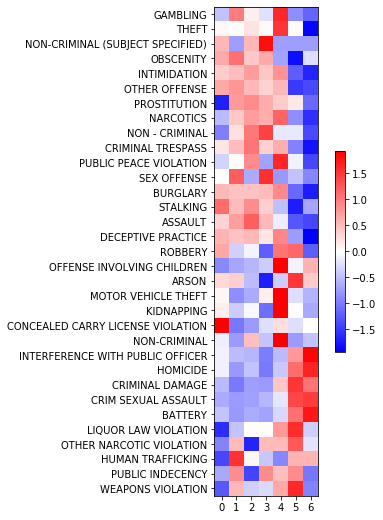

In [192]:
plt.figure(figsize = (6, 9))
scale_and_plot(day_by_type)

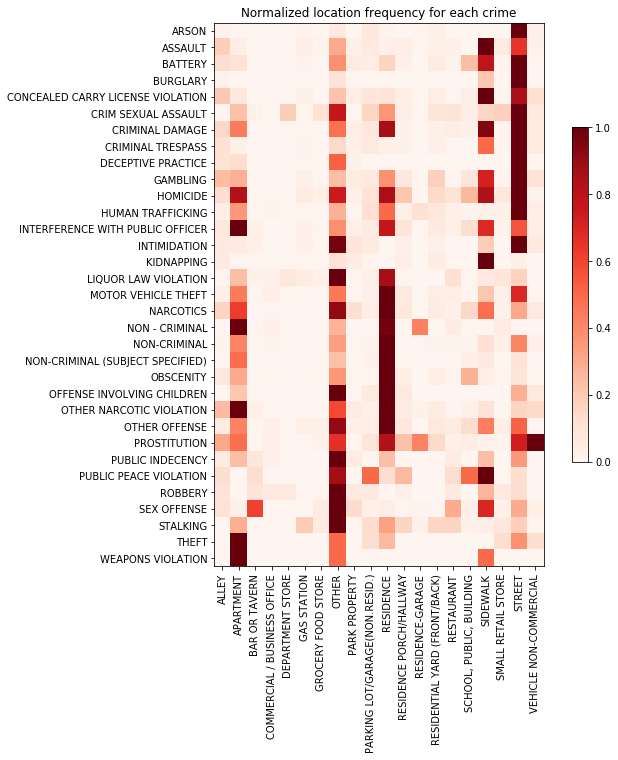

In [194]:
df = normalize(type_by_location)
ix = AC(3).fit(df.T).labels_.argsort() # a trick to make better heatmaps
plt.figure(figsize=(10, 10))
plt.imshow(df.T.iloc[ix,:], cmap='Reds')
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df.shape[0]), df.index, rotation='vertical')
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.title('Normalized location frequency for each crime')
plt.grid(False)
plt.show()